# WordCloud and NLTK Analysis 

Importing libraries needed

In [1]:
import pandas as pd 
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

Reading and filtering the data

In [2]:
df=pd.read_csv("files/EminemLyrics.csv")
df= df.filter(['Lyrics'])
df=df.dropna()
df

,Lyrics
0,look easy hurt feeling chance something wrong ...
1,sound like shut fan become hater beard weird a...
2,ugh monster swallow bottle alcohol feel like g...
3,look shot opportunity seize everything ever wa...
4,friend monster bed along voice inside head try...
...,...
496,man proof want drunk freestyle slurr slurr typ...
497,shady family hold like mothafuckin canopy even...
498,due massive amount bootlegging constant downlo...
499,may attention please may attention please real...


### WordCloud

Before anything, we need to remove stopwords or words that do not provide meaning in the larger context. Also in order to plot a wordcloud, we need to get all the text into one large string.

We use the **word_tokenize( )** funtion to break the large string containing all the lyrics into tokens,i.e, words. Tokenisation generally means to make a building block of a sentence into a token. So a token could be a word, character or even puncuation. However, we want the words here and have removed all the puncuations in the data cleaning step.

In [3]:
#list of unwanted words 
unwanted = ['man','give','way','never','come','make','back','know','like', 'ta', 'til','try','even','still','well','want','take']

#remove unwanted words, is saved back as a long text
df['Lyrics'] = df['Lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (unwanted)]))
#finwords

In [12]:
#Joinings the dataframe into a long string/TextBlob
text = " ".join(twt for twt in df['Lyrics'])
words = word_tokenize(text)

print ("There are {} words in the EminemLyrics dataset.".format(len(words)))
print ("There are {} unique words in the EminemLyrics dataset.".format(len(set(words))))

There are 129055 words in the EminemLyrics dataset.
There are 13138 unique words in the EminemLyrics dataset.


To make the wordcloud pretty, we will be using an image as a mask. We open the image and covert it into a numpy array which is accepted in the wordcloud. 

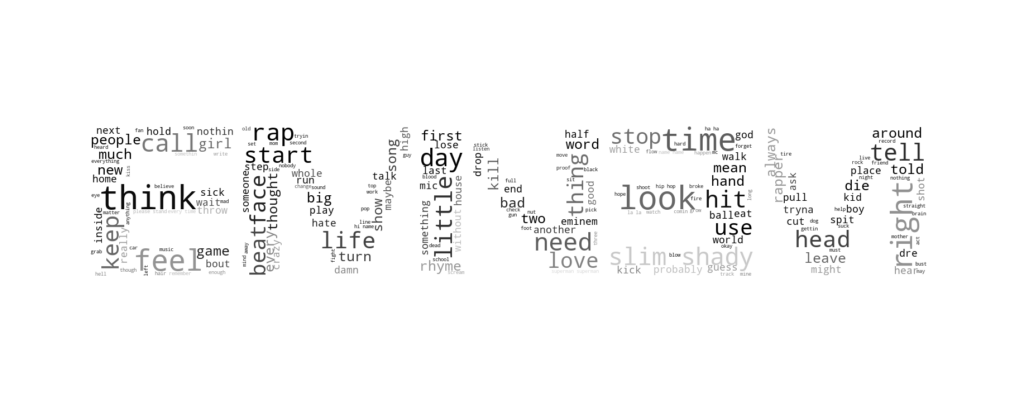

In [39]:
#Mask
mask = np.array(Image.open("files/eminem.jpg"))
#Generate WordCloud
wc= WordCloud(background_color="white", max_font_size=90, random_state=1, mask=mask, stopwords=STOPWORDS)
wc.generate(text)

#Plot World Cloud
plt.figure(figsize = (18, 10))
ic = ImageColorGenerator(mask)
plt.imshow(wc.recolor(color_func=ic), interpolation="bilinear")
plt.axis("off")
plt.show()
#wc.to_file("EminemWC.png")

### NLTK Analysis

Frequency Distribution simply tells us how many times a words has occured in a given text. We can use the **FreqDist( )** funtion from the **NLTK** library to perform this operation and find the common words that occur in all of Eminem's lyrics.

We need to tokenize the text in order to apply the FreqDist( ) function. 

In [41]:
from nltk.probability import FreqDist
words = word_tokenize(text)
fdist = FreqDist(words)
fdist.most_common(3)

[('time', 748), ('think', 685), ('shady', 642)]

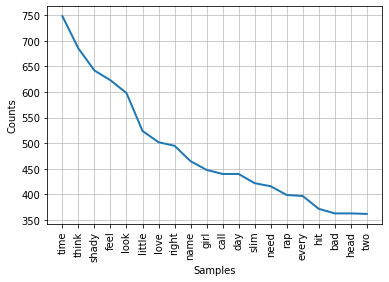

In [42]:
#Frequency Distribution
fdist.plot(20,cumulative=False)
plt.show()

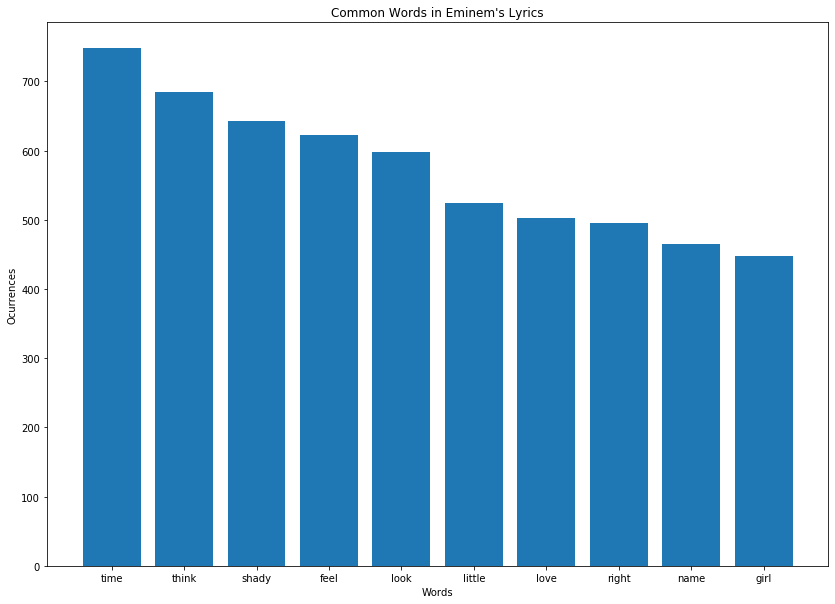

In [43]:
#Common Words Bar Graph
x , y = zip(*(fdist.most_common(10)))
plt.figure(figsize=(14, 10))
plt.bar(x, y)

plt.title("Common Words in Eminem's Lyrics")
plt.xlabel('Words')
plt.ylabel('Ocurrences')
plt.show()

In [ ]:
sorted(set(words))

### NLTK Sentiment Analysis

We are going to use a pretrained sentiment analyzer present in the NLTK library called **VADER**. 

It stands for **Valence Aware Dictionary and sEntiment Reasoner** and it is fast. It is trained on social media texts so it wont give us the best results. Additionaly, we can create our own analyzer/classifier by using a sentiment labelled dataset to find the common words or other features from it and train a classifier model to gain better resutls but since we do not have a labelled lyrics dataset, this would be our best option.

First, we find the sentiment for all the lryics present as a textblob in text and then apply the analyzer to every song to see the sentiment per song.

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#Sentiment of all the lyrics together
analyzer.polarity_scores(text)

{'neg': 0.208, 'neu': 0.651, 'pos': 0.141, 'compound': -1.0}

In [54]:
#Sentiment for every song
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    return 'neg' if polarity['neg'] > polarity['pos'] else 'pos'

sentiment = df['Lyrics'].apply(lambda x: fetch_sentiment(x)).value_counts()
sentiment

neg    352
pos    148
Name: Lyrics, dtype: int64

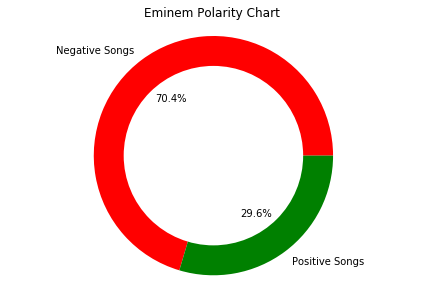

In [57]:
#Plotiing Sentiment
label = 'Negative Songs','Positive Songs'
color = ['red', 'green']

plt.pie(sentiment, labels=label, autopct='%1.1f%%', colors=color)

#draw center circle hole
cc = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(cc)

#display
plt.tight_layout()
plt.title('Eminem Polarity Chart')
plt.axis('equal')
plt.show()